In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
from pandas import DataFrame as df
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

5cv: 0.320332123909166 TEST: 0.712710395287464
rmse_5CV 0.8056166502393408


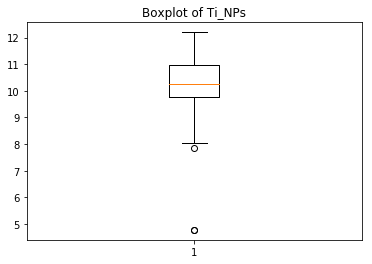

In [4]:
data = pd.read_csv(r'H:\Ti_NPs_RF.csv',engine='python')
df = pd.DataFrame(data)
plt.figure(figsize=(6, 4))
plt.boxplot(df['Ti_NPs'])
plt.title('Boxplot of Ti_NPs')
Q1 = df['Ti_NPs'].quantile(0.25)
Q3 = df['Ti_NPs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Ti_NPs'] >= lower_bound) & (df['Ti_NPs'] <= upper_bound)]
df = df[(df['Ti_NPs'] > 4.78)]
df.iloc[:, :1] = df.iloc[:, :1].astype(str)
df.fillna(df.mean())
data2 = df.fillna(df.mean())
y = data2['Ti_NPs']
columns_to_drop = ['No.', 'Ag_NPs', 'Cr_NPs', 'Cu_NPs', 'Fe_NPs', 'Hg_NPs', 'Mn_NPs', 'Pb_NPs', 'Ti_NPs']
x = data2.drop(columns=columns_to_drop, axis=1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=130)
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
CV_predictions = cross_val_predict(rfc, Xtrain,Ytrain,cv=5)
rmse = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)
print("rmse_5CV",rmse)

In [5]:
score_5cv_all = []
for i in range(0, 200, 1):
    rfc =RandomForestRegressor(random_state=i)
    score_5cv =cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))


score_5cv_all = []
for i in range(1, 400, 1):
    rfc = RandomForestRegressor(n_estimators=i
                                , random_state=random_state_5cv)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv)) 


score_5cv_all = []
for i in range(1, 300, 1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))


score_5cv_all = []
for i in range(1,x.shape[1]+1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=max_depth_5cv
                                ,max_features=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_features_5cv = range(1, x.shape[1]+1)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_features_5cv:{}".format(max_features_5cv))

Best_5cv score：0.3758532305727129 random_5cv:165
Best_5cv score：0.4237098026874957 n_est_5cv:19
Best_5cv score：0.4301485785607089 max_depth_5cv:8
Best_5cv score：0.4301485785607089 max_features_5cv:4


In [6]:
rfc = RandomForestRegressor(random_state=random_state_5cv
                            ,n_estimators=n_est_5cv
                            ,max_depth=max_depth_5cv
                            ,max_features=max_features_5cv)
RandomForest = rfc.fit(Xtrain, Ytrain)
test_predictions = RandomForest.predict(Xtest)
score_test = RandomForest.score(Xtest,Ytest)
score_train = RandomForest.score(Xtrain,Ytrain)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
rmse = np.sqrt(mean_squared_error(Ytest,test_predictions))
mae = MAE(Ytest, test_predictions)
print("train:",score_train)
print("test:",score_test)
print("score_5cv",CV_score)
print("rmse_test",rmse)
print("MAE",mae)
expvspred_test = {'Exp':Ytest,'Pred':test_predictions}
predictions = RandomForest.predict(x)
pre_Ti = {'Exp':y,'Pred':predictions}
pd.DataFrame(pre_Ti).to_excel(r'H:\Ti_NPs_RF_regression.xlsx')
rfc.score(Xtest,Ytest)

train: 0.8872677844665857
test: 0.697141789134271
score_5cv 0.4301485785607089
rmse_test 0.4827057483118145
MAE 0.3989455304928982


0.697141789134271

In [7]:
features_import = pd.DataFrame(Xtrain.columns, columns=['feature'])
features_import['importance'] = rfc.feature_importances_  
features_import.to_excel(r'H:\Ti_NPs_RF_imp.xlsx', index=False)
features_import

,feature,importance
0,TOC,0.430224
1,leachate_Cu,0.138639
2,leachate_Cr,0.104811
3,leachate_Fe,0.326326


In [8]:
dp = pd.read_csv(r'H:\NPs_prediction_dataset.csv',engine='python')
dp.iloc[:, :1] = dp.iloc[:, :1].astype(str)
dp.fillna(dp.mean())#均值代替平均值
dp2 = dp.fillna(dp.mean())#均值代替平均值后的data
columns_to_drop = [ 'leachate_Mn','leachate_Pb']
dp3=dp2.drop(columns=columns_to_drop, axis=1)
print(dp3)
predictions=RandomForest.predict(dp3)
pd.DataFrame(predictions).to_excel(r'H:\Ti_NPs_prediction_global.xlsx')

        TOC  leachate_Cu  leachate_Cr   leachate_Fe
0     414.0     20.00000    30.000000   1200.000000
1   19476.0    721.44382    40.000000    866.000000
2   24676.0    460.00000   170.000000   3380.000000
3    1256.0   2660.00000   885.476744  20538.604938
4    1299.0   2710.00000   885.476744  20538.604938
..      ...          ...          ...           ...
90   1061.0      3.00000   260.000000    365.000000
91   1458.0    100.00000  1380.000000   2037.000000
92    820.0     80.00000   200.000000   5500.000000
93   1000.0    100.00000   100.000000   8000.000000
94   1058.0    360.00000   450.000000  13200.000000

[95 rows x 4 columns]
